Tutorial: Data Wrangling and Splitting

Introduction: I use two different datasets for this tutorial. I use health data from the CDC's BRFSS and I use data dealing with airlines taken from Kaggle.

I will go over data wrangling, imputation, one-hot encoding, standardization, regularization, prediction, SBS feature importance, and ElasticNet feature importance.



BRFSS data surveys Americans from all 50 states. I'm unsure if this data has been used in political science previously, but this is the data I am using for my MA. 

First Dataset Variables:

FINALWT: The survey weights\
STATE: US State FIPS code\
RACE: Race\
AGE5YR: This is age broken down in 5 year ranges (i.e. 18-23, 23-28)\
SEX: Sex (1 male, 2 female)\
GENHLTH: Respondents reported general health based on 1-30 days of the month\
PHYSHLTH: Respondents reported physical health based on 1-30 days of the month\
MENTHLTH: Respondents reported mental health based on 1-30 days of the month\
MARITAL: Respondents marital status\
EDUCA: Respondents education-- higher number means more education\
INCOME2: Respondents income range-- higher number means more income\
YEAR: Year of the data (2020)


In [1]:
#First Dataset

import pandas as pd
    
data = pd.read_csv('HemauerMethodsTutorial.csv')
print(data.head())

data.isnull().sum() #This sums and reports all NA values in each column
#As you can see, people don't like to report their income

   Unnamed: 0      FINALWT  STATE  RACE  AGE5YR  SEX  GENHLTH  PHYSHLTH  \
0           1   284.335672      1     1       8    2      2.0       3.0   
1           2   171.283329      1     2      10    2      3.0      88.0   
2           3  1334.368863      1     2      10    2      3.0      88.0   
3           4  1297.486618      1     1      13    2      1.0      88.0   
4           5   454.815127      1     1      13    2      2.0      88.0   

   MENTHLTH  MARITAL  EDUCA  EMPLOY  INCOME2  YEAR  
0      30.0      2.0    6.0     4.0      1.0  2020  
1      88.0      3.0    6.0     7.0     99.0  2020  
2      88.0      1.0    5.0     7.0      7.0  2020  
3      88.0      3.0    4.0     5.0     99.0  2020  
4      88.0      3.0    6.0     7.0     77.0  2020  


Unnamed: 0      0
FINALWT         0
STATE           0
RACE            0
AGE5YR          0
SEX             0
GENHLTH         2
PHYSHLTH        2
MENTHLTH        2
MARITAL         3
EDUCA           3
EMPLOY         53
INCOME2       115
YEAR            0
dtype: int64

In the next few sections, I showcase imputations.

In [2]:
#Dropping values in various ways

data.dropna(axis = 0) #This drops all rows that have an NA value
#data.dropna(axis = 1) #This drops all columns that have an NA value

data = pd.read_csv('HemauerMethodsTutorial.csv') #Recalling the CSV

data.dropna(subset = ['MARITAL']) #Only drops rows where NA appears in a speciifc column
data.dropna(thresh = 6) #Drops rows that have NA in at least 6 columns

,Unnamed: 0,FINALWT,STATE,RACE,AGE5YR,SEX,GENHLTH,PHYSHLTH,MENTHLTH,MARITAL,EDUCA,EMPLOY,INCOME2,YEAR
0,1,284.335672,1,1,8,2,2.0,3.0,30.0,2.0,6.0,4.0,1.0,2020
1,2,171.283329,1,2,10,2,3.0,88.0,88.0,3.0,6.0,7.0,99.0,2020
2,3,1334.368863,1,2,10,2,3.0,88.0,88.0,1.0,5.0,7.0,7.0,2020
3,4,1297.486618,1,1,13,2,1.0,88.0,88.0,3.0,4.0,5.0,99.0,2020
4,5,454.815127,1,1,13,2,2.0,88.0,88.0,3.0,6.0,7.0,77.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9499,50.588524,4,1,13,2,1.0,88.0,88.0,2.0,4.0,7.0,77.0,2020
9499,9500,55.397871,4,1,13,1,2.0,88.0,88.0,1.0,6.0,7.0,8.0,2020
9500,9501,150.461548,4,1,8,2,2.0,88.0,2.0,1.0,5.0,1.0,7.0,2020
9501,9502,69.850630,4,1,11,2,3.0,4.0,88.0,1.0,5.0,7.0,6.0,2020


In [3]:
#Imputing using mean

from sklearn.impute import SimpleImputer
import numpy as np

data = pd.read_csv('HemauerMethodsTutorial.csv') #Recall data

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #Imputes all NA values using mean
imputer = imputer.fit(data.values) #Fits imputer to data
data = imputer.transform(data.values) #Transforms and imputes data

data = pd.DataFrame(data) #Converting Numpy array to PD dataframe
data.isnull().sum() #As you can see, now there are no missing values

#A much easier way:
#data.fillna(data.mean())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [4]:
#Imputing using K Nearest Neighbor

from sklearn.impute import KNNImputer

data2 = pd.read_csv('HemauerMethodsTutorial.csv') #Recall data

imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
data2 = imputer.fit_transform(data2)

data2 = pd.DataFrame(data2) #Converting Numpy array to PD dataframe

print(data2.isnull().sum()) 
print(data2.mean() - data.mean()) #As you can see, the values are minimally different in this case... as there are thousands of observations and few imputations

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000192
7    -0.003335
8     0.001524
9     0.000419
10    0.000025
11    0.000650
12    0.025544
13    0.000000
dtype: float64


Here I use a second dataset from Kaggle. It is airline data. I use this dataset to show how the Gender column can be switched from strings to a dummy variable.

In [5]:
#Second Dataset

data = pd.read_csv('HemauerMethodsTutorial2.csv') #Call New Dataset (Airline)
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [6]:
#Encoding String Variables to Integer

gender = {'Male': 0, 'Female': 1} #Mapping response options to a unique value
data['Gender'] = data['Gender'].map(gender) #Changing the table directly using mapping values
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,1,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,0,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,0,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,1,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,0,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [7]:
#Auto-encode String Variables to Integer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('HemauerMethodsTutorial2.csv') #Call Dataset (Airline)

genderEncoder = LabelEncoder()
data['Gender'] = genderEncoder.fit_transform(data['Gender']) #Fit and Transform specified column
data.head() #As you can see, this is a way to automate the data encoding

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,0,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,1,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,1,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,0,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,1,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


However, for machine learning purposes, this presents an issue. If using categorical data, a classifier will think that the higher value variables are greater. 
Therefore, we must expand the single column into 3+.
An easy way to do this is with Pandas get_dummies().
Get_dummies() can be used instead of OneHotEncoder().

In [8]:
data = pd.read_csv('HemauerMethodsTutorial2.csv') #Call Dataset (Airline)
data.head()
pd.get_dummies(data[['Flight Status']], drop_first = False) #With column 'Flight Status' apply get.dummies()


,Flight Status_Cancelled,Flight Status_Delayed,Flight Status_On Time
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
98614,1,0,0
98615,1,0,0
98616,0,0,1
98617,1,0,0


In [9]:
#Review of how to partition data into train and test sets and feature scale

#Note: In some cases, it may make more sense to use standardization instead of feature scaling (Check Chapter 4 of textbook)
#In sum: Feature scaling centers values around mean zero which is an issue for many linear models

from sklearn.model_selection import train_test_split

data = pd.read_csv('HemauerMethodsTutorial.csv') #Back to dataset one
data = data.dropna(axis = 0)

X, y = data, data.iloc[:, 9].values #Subsetting data, removing unnecessary columns
X = pd.DataFrame(X)
X = X.drop(X.columns[[0, 1, 2, 5, 9, 13]], axis = 1)
X = X.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})
XTrain, XTest, yTrain, yTest = train_test_split(X, y,
                                                   test_size = 0.2,     #Sets 30% of data to test data
                                                   random_state = 1337, #Setting seed for reproducibility
                                                   stratify = y)       #Stratify ensures both training and test sets have the same class proportions as the original set

from sklearn.preprocessing import MinMaxScaler #"Feature Scaling" does not need to be done on decision trees and random forests

mms = MinMaxScaler() #Sets function to a calling variable
XTrainScaled = mms.fit_transform(XTrain) #Apply the function on both variables
xTestNorm = mms.transform(XTest)

xTestNorm = pd.DataFrame(xTestNorm) #To use head()
xTestNorm.head() 

,0,1,2,3,4,5,6,7
0,0.000,0.461538,0.375,0.091837,0.193878,0.500,0.875,0.051020
1,0.000,0.769231,0.125,0.887755,0.040816,0.625,0.000,0.071429
2,0.000,0.692308,0.000,0.887755,0.887755,0.500,0.000,0.071429
3,0.125,0.076923,0.250,0.887755,0.887755,0.250,0.000,0.000000
4,0.000,0.769231,0.250,0.887755,0.887755,0.625,0.750,0.071429


In this section, I use regularization to scale the model. Then using logistic regression, I predict a respondents marital status based upon the other variables in the dataset. I find that the predictive accuracy is quite high... suggesting that factors such as reported health are strongly associated with marital status. First, I show regularization with standarization. Second, I show regularization without standardization. Standardization does little to change regularization results.

In [10]:
#Using regularization to reduce feature detail/overfitting

#Note
#Regularization: Lasso/Ridge to reduce overfitting/feature detail
#Standardization: Scale all features equally
#Feature Scaling: Scale features around mean zero

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XTrainStd = scaler.fit_transform(XTrain) #Standardization instead of feature scaling because dealing with Logistic regression
XTestStd = scaler.fit_transform(XTest) #Standardize X but not y... because X are our features

logi = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear', multi_class = 'ovr')
#C controls regularization strength... increase to make stronger
#L1 is useful for feature selection, L2 is useful for collinear/codependent features
#L1 is Lasso, L2 is Ridge Regression (One word for L1, Two words for L2)
#Elastic Net combines L1 and L2

logi.fit(XTrainStd, yTrain) 
print("Training Accuracy:", logi.score(XTrainStd, yTrain)) #Running logistic classification
print("Test Accuracy:", logi.score(XTestStd, yTest))

Training Accuracy: 0.5575975496071381
Test Accuracy: 0.5575079872204473


Next, I show how predictive performance changes based upon imputation method. Imputing using mean, instead of dropping NaN values, improves predictive performance.

In [11]:
#Imputing using mean

from sklearn.impute import SimpleImputer
import numpy as np

data = pd.read_csv('HemauerMethodsTutorial.csv') #Recall data

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #Imputes all NA values using mean
imputer = imputer.fit(data.values) #Fits imputer to data
data = imputer.transform(data.values) #Transforms and imputes data

data = pd.DataFrame(data) #Converting Numpy array to PD dataframe

from sklearn.model_selection import train_test_split

X, y = data, data.iloc[:, 9].values #Subsetting data, removing unnecessary columns
X = pd.DataFrame(X)
X = X.drop(X.columns[[0, 1, 2, 5, 9, 13]], axis = 1)
X = X.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})
y = genderEncoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y,
                                                   test_size = 0.2,     #Sets 30% of data to test data
                                                   random_state = 1337, #Setting seed for reproducibility
                                                   stratify = y)       #Stratify ensures both training and test sets have the same class proportions as the original set

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XTrainStd = scaler.fit_transform(XTrain) #Standardization instead of feature scaling because dealing with Logistic regression
XTestStd = scaler.fit_transform(XTest) #Standardize X but not y... because X are our features

logi = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear', multi_class = 'ovr')
#C controls regularization strength... increase to make stronger
#L1 is useful for feature selection, L2 is useful for collinear/codependent features
#L1 is Lasso, L2 is Ridge Regression (One word for L1, Two words for L2)
#Elastic Net combines L1 and L2

logi.fit(XTrainStd, yTrain) 
print("Training Accuracy:", logi.score(XTrainStd, yTrain)) #Running logistic classification
print("Test Accuracy:", logi.score(XTestStd, yTest))

Training Accuracy: 0.5566956064193633
Test Accuracy: 0.563387690689111


In comparison to mean imputation, K-Nearest Neighbor imputation does worse among the test data.

In [21]:
#Imputing using K Nearest Neighbor

from sklearn.impute import KNNImputer

data = pd.read_csv('HemauerMethodsTutorial.csv') #Recall data

imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
data = imputer.fit_transform(data)

#Convert DataFrame to integers
data = data.astype(int)
data = pd.DataFrame(data) #Converting Numpy array to PD dataframe

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, data.columns.values], data.iloc[:, 9].values #Subsetting data, removing unnecessary columns
X = pd.DataFrame(X)
X = X.drop(X.columns[[0, 1, 2, 5, 9, 13]], axis = 1)
X = X.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})
y = genderEncoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y,
                                                   test_size = 0.2,     #Sets 30% of data to test data
                                                   random_state = 1337, #Setting seed for reproducibility
                                                   stratify = y)       #Stratify ensures both training and test sets have the same class proportions as the original set

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XTrainStd = scaler.fit_transform(XTrain) #Standardization instead of feature scaling because dealing with Logistic regression
XTestStd = scaler.fit_transform(XTest) #Standardize X but not y... because X are our features

logi = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear', multi_class = 'ovr')
#C controls regularization strength... increase to make stronger
#L1 is useful for feature selection, L2 is useful for collinear/codependent features
#L1 is Lasso, L2 is Ridge Regression (One word for L1, Two words for L2)
#Elastic Net combines L1 and L2

logi.fit(XTrainStd, yTrain) 
print("Training Accuracy:", logi.score(XTrainStd, yTrain)) #Running logistic classification
print("Test Accuracy:", logi.score(XTestStd, yTest))

#XTrainStd.head()

Training Accuracy: 0.5573533280715601
Test Accuracy: 0.5612835349815887


Next, I illustrate both SBS and ElastiNet.

In [13]:
#Creating SBS function through plagarizing

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS:
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
    
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
        
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

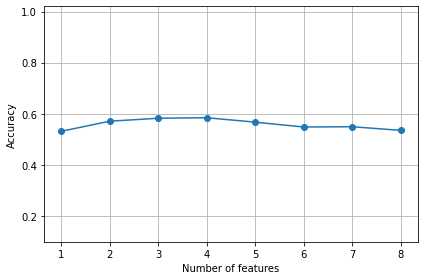

In [14]:
#Illustrating SBS (Sequential Backward Selection)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(XTrainStd, yTrain)     #Fitting SBS

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.1, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()            #This shows that predictive accuracy decreases as the data becomes overfit

Defaulting to user installation because normal site-packages is not writeable


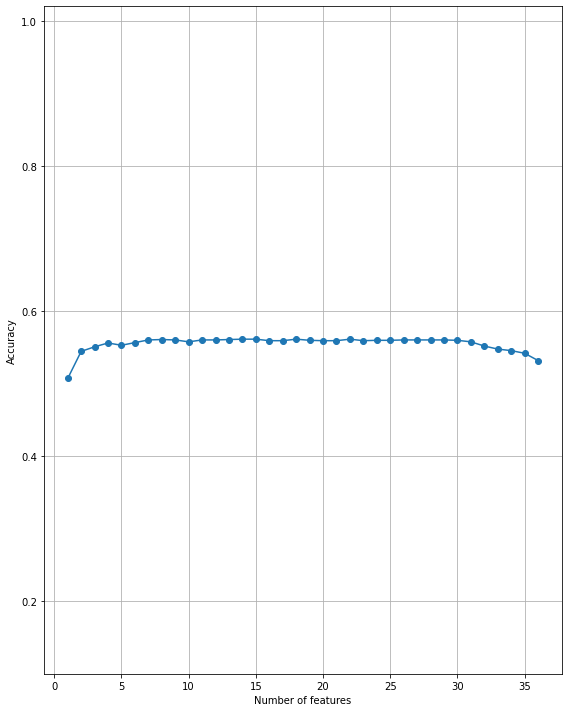

In [45]:
#Adding polynomial terms

!pip install sklearn-pandas
from sklearn.preprocessing import PolynomialFeatures
from sklearn_pandas import DataFrameMapper

data = pd.read_csv('HemauerMethodsTutorial.csv')

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #Imputes all NA values using mean
imputer = imputer.fit(data.values) #Fits imputer to data
data = imputer.transform(data.values) #Transforms and imputes data

data = pd.DataFrame(data) 

X, y = data.iloc[:, data.columns.values], data.iloc[:, 9].values #Subsetting data, removing unnecessary columns
X = pd.DataFrame(X)
X = X.drop(X.columns[[0, 1, 2, 5, 9, 13]], axis = 1)
X = X.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})
y = genderEncoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y,
                                                   test_size = 0.2,     #Sets 30% of data to test data
                                                   random_state = 1337, #Setting seed for reproducibility
                                                   stratify = y)       #Stratify ensures both training and test sets have the same class proportions as the original set

XTrain = pd.DataFrame(XTrain)
XTrain = XTrain.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})

XTest = pd.DataFrame(XTest)
XTest = XTest.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})

poly_features = DataFrameMapper([
    (['AGE5YR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'EDUCA',           #Selecting Only the Polynomial Features
      'EMPLOY', 'INCOME2'], PolynomialFeatures(degree=3))])

XTrain.columns = XTrain.columns.astype(str)
XTest.columns = XTest.columns.astype(str)

#Add second- and third-degree polynomial (square and cubic) terms to the features
X_train_poly = poly_features.fit_transform(XTrain)
X_test_poly = poly_features.transform(XTest)

#X_train_poly = scaler.fit_transform(X_train_poly)
#X_test_poly = scaler.fit_transform(X_test_poly)

#X_train_poly = pd.DataFrame(X_train_poly)
#X_test_poly = pd.DataFrame(X_test_poly)


sbs.fit(X_train_poly, yTrain)     #Fitting SBS

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.1, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()  

#X_train_poly = pd.DataFrame(X_train_poly)
#X_train_poly.head()

Assessing feature importance using random forest and ElastiNet

 1) 1                              0.256733
 2) 7                              0.178929
 3) 4                              0.108729
 4) 3                              0.106051
 5) 2                              0.102284
 6) 6                              0.093579
 7) 5                              0.091170
 8) 0                              0.062525


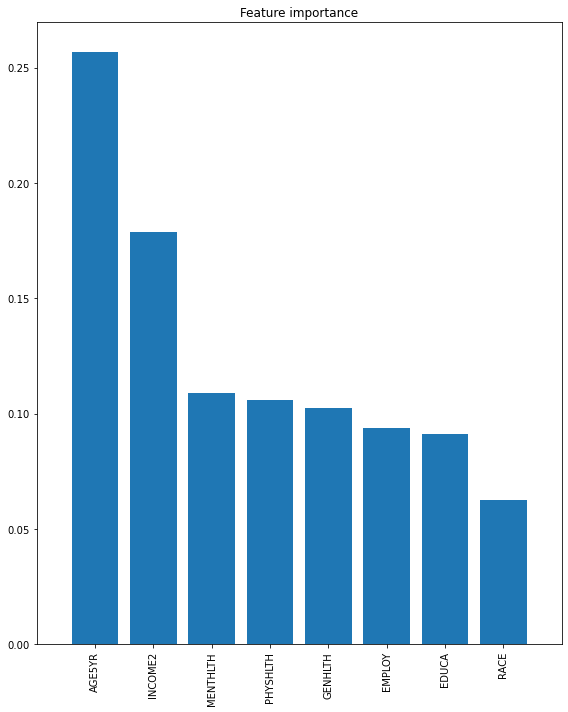

In [32]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

data = pd.read_csv('HemauerMethodsTutorial.csv') #Recall data

imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
data = imputer.fit_transform(data)

data = pd.DataFrame(data) #Converting Numpy array to PD dataframe

X, y = data, data.iloc[:, 9].values #Subsetting data, removing unnecessary columns
X = pd.DataFrame(X)
X = X.drop(X.columns[[0, 1, 2, 5, 9, 13]], axis = 1)
X = X.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})
y = genderEncoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y,
                                                   test_size = 0.2,     #Sets 30% of data to test data
                                                   random_state = 1337, #Setting seed for reproducibility
                                                   stratify = y)       #Stratify ensures both training and test sets have the same class proportions as the original set

XTrain = XTrain.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})
XTest = XTest.rename(columns = {3: "RACE", 4: "AGE5YR", 6: "GENHLTH", 7: "PHYSHLTH", 8: "MENTHLTH", 10: "EDUCA", 11: "EMPLOY", 12: "INCOME2"})

featLabels = data.columns.difference(['MARITAL'])
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(XTrain, yTrain)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(XTrain.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            featLabels[indices[f]],
                            importances[indices[f]]))
    
plt.title('Feature importance')
plt.bar(range(XTrain.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(XTrain.shape[1]),
           ['AGE5YR', 'INCOME2', 'MENTHLTH', 'PHYSHLTH', 'GENHLTH', 'EMPLOY', 'EDUCA', 'RACE'], rotation=90)
plt.xlim([-1, XTrain.shape[1]])
plt.tight_layout()
plt.show()
#The plot shows that Age, Income, and Mental Health are the most import factors in determing marital status

[ 0.00031562  0.00031562  0.00178853 -0.00010521  0.00852183  0.00189374
 -0.01073119  0.00631247]


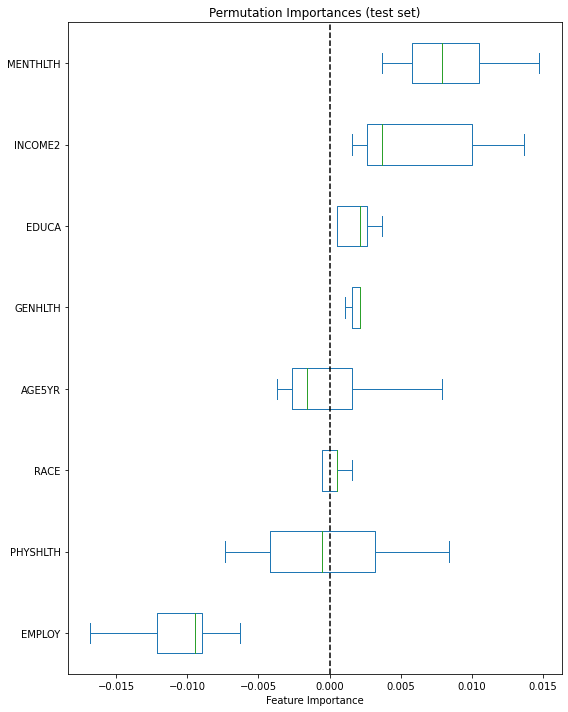

In [30]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(logi, XTest, yTest)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Plot the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns = X.columns[sorted_importances_idx],)

LRP = importances.plot.box(vert=False, whis=10)
LRP.set_title("Permutation Importances (test set)")
LRP.axvline(x=0, color="k", linestyle="--")
LRP.set_xlabel("Feature Importance")
LRP.figure.tight_layout()

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

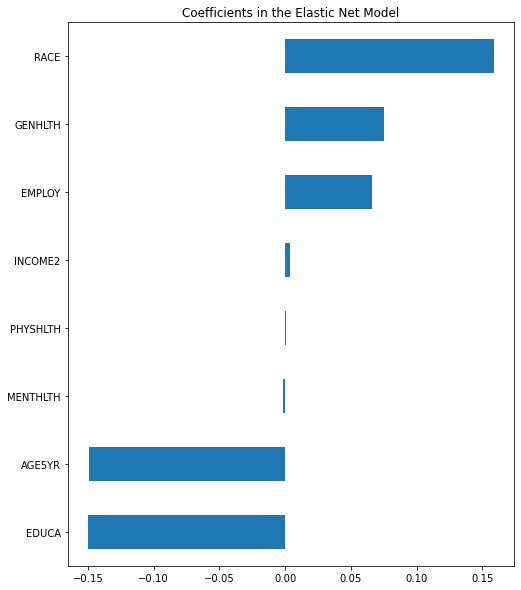

In [26]:
#Illustrating Elastic Net Feature Importance

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import matplotlib
from itertools import product

elastic = ElasticNet(alpha=0.0005, l1_ratio=0.9)
elastic.fit(XTrain, yTrain)

XTrain = pd.DataFrame(XTrain)
coef = pd.Series(elastic.coef_, index = XTrain.columns)
imp_coef = pd.concat([coef.sort_values().head(4),         #These coefficients must be adjusted to new data
                     coef.sort_values().tail(4)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

#The plot shows two sets of indexes. The top 10 are positive and the bottom 10 are negative. The plot shows that index 8, MENTHLTH, is the most important feature. 
#Unlike the random forest, elastic net does not put importance on race and employment